## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from IPython.display import display

df=pd.read_csv('data.csv') # путь к data.csv
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

**children** — количество детей в семье  
**days_employed** — общий трудовой стаж в днях  
**dob_years** — возраст клиента в годах  
**education** — уровень образования клиента  
**education_id** — идентификатор уровня образования  
**family_status** — семейное положение  
**family_status_id** — идентификатор семейного положения  
**gender** — пол клиента  
**income_type** — тип занятости  
**debt** — имел ли задолженность по возврату кредитов  
**total_income** — ежемесячный доход  
**purpose** — цель получения кредита  


In [3]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Судя по всему, информация в обоих столбцах отсутствует у одних и тех же клиентов. Но на всякий случай проверим:

In [4]:
df.dropna().info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19351 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         19351 non-null  int64  
 3   education         19351 non-null  object 
 4   education_id      19351 non-null  int64  
 5   family_status     19351 non-null  object 
 6   family_status_id  19351 non-null  int64  
 7   gender            19351 non-null  object 
 8   income_type       19351 non-null  object 
 9   debt              19351 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           19351 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.9+ MB


Так и есть. Показатели ежемесячного дохода отсутствуют у тех клиентов, которые не указали свой трудовой стаж. Вероятнее всего это не случайность, а следствие отсутствия данных в анкете.

Распределение по кол-ву детей среди клиентов с неизвестным доходом


,count,%
children,,
-1,3,0.137994
0,1439,66.191352
1,475,21.849126
2,204,9.383625
3,36,1.655934
4,7,0.321987
5,1,0.045998
20,9,0.413983


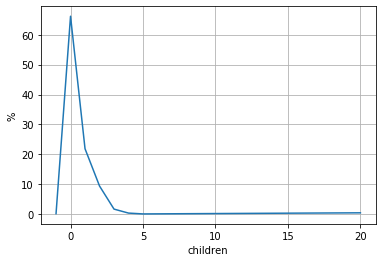

In [5]:
df_nan=df[df['days_employed'].isna()]
df_not_nan=df[df['days_employed'].isna()!=True]
df_nan_children=df_nan.groupby(['children'])['debt'].agg(['count'])
df_nan_children['%']=df_nan_children/len(df_nan)*100
df_nan_children['%'].plot(grid=True).set_ylabel('%')
print('Распределение по кол-ву детей среди клиентов с неизвестным доходом')
display(df_nan_children)

Сравним с распределением по всей выборке:

Распределение по кол-ву детей среди клиентов с известным доходом


,count,%
children,,
-1,44,0.227378
0,12710,65.681360
1,4343,22.443285
2,1851,9.565397
3,294,1.519301
4,34,0.175702
5,8,0.041342
20,67,0.346235


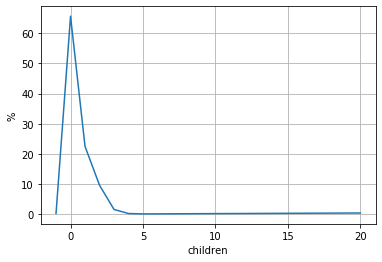

In [6]:
dfch=df_not_nan.groupby('children')['children'].agg(['count'])
dfch['%']=dfch/len(df_not_nan)*100
dfch['%'].plot(grid=True).set_ylabel('%')
print('Распределение по кол-ву детей среди клиентов с известным доходом')
display(dfch)

Как видно из этих таблиц, распределение по кол-ву детей среди данной выборки и исходного массива очень похожи. На всякий случай оценим и процент просроченных кредитов для обеих частей выборки:

In [7]:
df_debt=df_not_nan.groupby('debt')['debt'].agg(['count'])
df_debt['%']=df_debt/len(df_not_nan)*100
df_debt

,count,%
debt,,
0,17780,91.881557
1,1571,8.118443


In [8]:
df_debt=df_nan.groupby('debt')['debt'].agg(['count'])
df_debt['%']=df_debt/len(df_nan)*100
df_debt

,count,%
debt,,
0,2004,92.180313
1,170,7.819687


Как видно из таблиц, по распределению `debt` данные также близки — а значит стоит включить их в дальнейшем как минимум в анализ влияния `children` на `debt`.

### children 
Тип значений столбца - int64, а значит кол-во детей у клиентов хотя бы целое. Взглянем на уникальные значения столбца и их частоту в процентах.

Почти две трети не имеют детей. Ещё чуть меньше трети имеют одного или двух детей, а с дальнейшим ростом показателя его частотность резко падает - это вызвано объективными экономическими и биологическими причинами. Вряд ли после удаления из таблицы возможных дубликатов эта закономерность изменится.  
Два значения из серии являются проблемой:
- **-1** - количество детей не может быть отрицательным. 
- **20** - нельзя отрицать принципиальную возможность завести/усыновить 20 детей, но вероятность появления в базе такого большого количества людей, которые завели ровно 20 детей (не больше и не меньше) — это явная аномалия.

### days_employed и dob_years

Даже при поверхностном изучении бросается в глаза кол-во отрицательных значений столбца **days_employed**.

In [9]:
len(df[df['days_employed']<0])

15906

Почти три четверти всех данных. Т.к. уточнить ситуацию не у кого, а отбросить три четверти выборки и надеяться на адекватный результат анализа невозможно, придется исходить из гипотезы, что скорее всего значения в этом столбце по модулю отражают действительность, но по каким-то техническим причинам оказались записаны со знаком минус.
Для проверки попробуем найти примерный минимальный возраст начала трудовой деятельности для клиента, имея его возраст в годах и трудовой стаж в днях, и не противоречит ли это законодательству и здравому смыслу.  
Для начала удостоверимся, что значения в колонке `dob_years` не принимают аномальных значений. 

In [10]:
df.groupby('dob_years')['dob_years'].count()

dob_years
0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

Возраст клиента ~0 лет никак не может быть реальным. Взглянем на эти значения поближе

In [11]:
df[df['dob_years']==0].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,-2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,-1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,-1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
1149,0,-934.654854,0,среднее,1,женат / замужем,0,F,компаньон,0,201852.430096,покупка недвижимости
1175,0,370879.508002,0,среднее,1,женат / замужем,0,F,пенсионер,0,313949.845188,получение дополнительного образования
1386,0,-5043.219890,0,высшее,0,женат / замужем,0,M,госслужащий,0,240523.618071,сделка с автомобилем
1890,0,NaN,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,NaN,жилье
1898,0,370144.537021,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,127400.268338,на покупку автомобиля


In [12]:
dfch=df[df['dob_years']==0]
dfch=dfch.groupby('children')['children'].agg(['count'])
dfch['percent']=dfch/101*100
dfch

,count,percent
children,,
0,69,68.316832
1,16,15.841584
2,13,12.871287
3,2,1.980198
20,1,0.990099


По крайней мере, распределение по кол-ву детей в этой небольшой выборке соответствует тому, что мы наблюдаем на большом объеме даннных — с ростом числа детей частота падает. Полагаю, отбрасывать эти значения не стоит. Возраст в этих строках можно заменить на характерный для каждого вида занятости (например средний), но перед нами не стоит цели анализировать зависимость задолженности от возраста. Вероятно, в будущем нас может заинтересовать информация о пожилых людях (в критической ситуации наличие детей может послужить определенной страховкой), но для этих целей у нас уже есть категория `пенсионер`.  
Теперь оценим минимальный возраст, в котором клиент должен был начать трудовую деятельность, чтобы получить указанный в колонке трудовой стаж. Для этого сравним разность их текущего возраста и модуля их трудового стажа в года (для наших целей 365.25 вполне разумное приближение). Сохраним полученное значение в столбец `start_job_age`

In [13]:
df['start_job_age']=df['dob_years']-abs(df['days_employed'])/365.25
df[df['start_job_age']<14].groupby('income_type')['income_type'].agg(['count'])

,count
income_type,
безработный,2
госслужащий,7
компаньон,22
пенсионер,3443
сотрудник,60


In [14]:
df[df['start_job_age']<10]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,start_job_age
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,-878.597733
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля,-1042.910026
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью,-869.904731
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости,-928.341518
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью,-856.772535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу,-874.870955
21508,0,386497.714078,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость,-996.173071
21509,0,362161.054124,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью,-932.542927
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем,-964.944451


Как видно из столбца `start_job_age`, гипотетический возраст, в котором пенсионеры должны были приступить к работе у многих получился не просто отрицательным (что можно было бы списать на особенности учета трудового стажа у работников вредных производств), а резко отрицательным и выходящим за пределы разумного. При этом кол-во таких записей существенно превышает число людей с возрастом 0. По всей видимости данным в этом столбце мы доверять в полной мере не можем. Но к счастью основную задачу можно решить без обращения к столбцам `dob_years` и `days_employed`, если предполагать, что в большинстве остальных столбцов данные указаны преимущественно верно, а значения столбцов неадекватны потому, что заказчик не думал, что они нам понадобятся.

### education и education_id
Выведем уникальные значения столбца `education`:

In [15]:
df.groupby('education')['education'].count()

education
ВЫСШЕЕ                   274
Высшее                   268
НАЧАЛЬНОЕ                 17
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
Начальное                 15
Неоконченное высшее       47
СРЕДНЕЕ                  772
Среднее                  711
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
высшее                  4718
начальное                250
неоконченное высшее      668
среднее                13750
ученая степень             4
Name: education, dtype: int64

Для удобства заменим на запись строчными:

In [16]:
df['education']=df.education.str.lower()
df.groupby('education')['education'].count()

education
высшее                  5260
начальное                282
неоконченное высшее      744
среднее                15233
ученая степень             6
Name: education, dtype: int64

Сравним этот набор с набором 'education_id'

In [17]:
df.groupby('education_id')['education_id'].count()

education_id
0     5260
1    15233
2      744
3      282
4        6
Name: education_id, dtype: int64

Будем считать, что с этими данными по крайней мере на первый взгляд всё в порядке и оставим их в покое.

### family_status и family_status_id

In [18]:
df['family_status']=df.family_status.str.lower()
df.groupby('family_status')['family_status'].count()

family_status
в разводе                 1195
вдовец / вдова             960
гражданский брак          4177
женат / замужем          12380
не женат / не замужем     2813
Name: family_status, dtype: int64

In [19]:
df.groupby('family_status_id')['family_status_id'].count()

family_status_id
0    12380
1     4177
2      960
3     1195
4     2813
Name: family_status_id, dtype: int64

In [20]:
df.groupby('gender')['gender'].count()

gender
F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [21]:
df[df['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,start_job_age
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости,17.542504


Остальные данные клиента выглядят в целом адекватно, а среди поставленных задач нет ни одной, зависящей от пола клиента.

### income_type

In [22]:
df.groupby('income_type')['income_type'].count()

income_type
безработный            2
в декрете              1
госслужащий         1459
компаньон           5085
пенсионер           3856
предприниматель        2
сотрудник          11119
студент                1
Name: income_type, dtype: int64

Можно выделить 4 пригодные для анализа группы: компаньоны, госслужащие, пенсионеры и сотрудники. 

### debt

In [23]:
df.groupby('debt')['debt'].count()

debt
0    19784
1     1741
Name: debt, dtype: int64

В самом интересном нам показателе — наличии задолженности по возврату кредита — серьезный перевес в сторону клиентов, исполняющих свои обязательства в срок.

### total_income

Text(0.5, 0, 'клиенты')

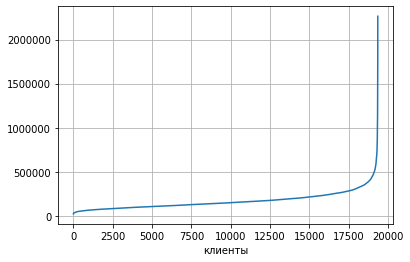

In [24]:
df_sort_ti=df.sort_values('total_income',ascending=True).reset_index()
df_sort_ti['total_income'].plot(grid=True).set_xlabel('клиенты')

Данные очень разнородные с небольшим количеством явно сверхбогатых (на фоне остальных) людей и отсутствием людей с отрицательными доходами. Можно было ввести множество различных параметров и попытаться исключить, например, сверхбогатых госслужащих или людей с доходами, не характерными для их образования. Но в реальности этот параметр зависит от куда большего количества параметров, чем есть у нас на руках, а исходя из ТЗ мы на данный момент даже не можем уверенно заявить, например, что речь идет о рублях.

In [25]:
print('Максимальный доход в месяц для госслужащего: {:.2f}'.format(df[df['income_type']=='госслужащий']['total_income'].max()))

Максимальный доход в месяц для госслужащего: 910451.47


In [26]:
print('Медиана: {:.2f}'.format(df['total_income'].median()))
print('Кол-во клиентов с доходом >500k/месяц: {:}'.format(df[df['total_income']>500000]['total_income'].count()))

Медиана: 145017.94
Кол-во клиентов с доходом >500k/месяц: 222


Перепроверить эти данные у нас возможности нет, а значит и оценивать их влияние на возвратность кредита будем как есть, выделив аномально высокие для выборки доходы в отдельную категорию.

### purpose

In [27]:
df.groupby('purpose')['purpose'].count()

purpose
автомобили                                478
автомобиль                                495
высшее образование                        453
дополнительное образование                462
жилье                                     647
заняться высшим образованием              496
заняться образованием                     412
на покупку автомобиля                     472
на покупку подержанного автомобиля        479
на покупку своего автомобиля              505
на проведение свадьбы                     777
недвижимость                              634
образование                               447
операции с жильем                         653
операции с коммерческой недвижимостью     651
операции с недвижимостью                  676
операции со своей недвижимостью           630
покупка жилой недвижимости                607
покупка жилья                             647
покупка жилья для сдачи                   653
покупка жилья для семьи                   641
покупка коммерческой недви

Исходя из полученного списка, цели кредита можно разделить на: жилье, автомобиль, образование, свадьба и коммерция. Возможно стоит объединить операции связанные с жильем и коммерческой недвижимостию, т.к. обе цели подразумевают большие капиталовложения и при этом существует вероятность их перепутать из-за расплывчатых формулировок клиента (покупка недвижимости, строительство недвижимости и т.п.)

### Вывод

Большая часть данных выглядит реальной. Исходя из поставленной задачи мы можем игнорировать столбцы `days_employed`,`dob_years`,`education`,`education_id` и `gender`. Придется исключить небольшое кол-во клиентов, в записях о которых указано неадекватное кол-во детей (даже если среди клиентов и есть человек с 20 детьми - нас интересуют тенденции, а не единичные случаи). 

### Обработка пропусков

In [28]:
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,start_job_age
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,18.898910
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,24.980688
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,17.603908
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,20.707058
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,-878.597733
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,24.464241
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,35.117174
7,0,-152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,49.581712
8,2,-6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,16.027063
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,35.007511


Можно было бы допустить смелое предположение, что раз кол-во детей, которых заводят клиенты из категории с неизвестными доходами, распределено примерно так же, как и в основном по выборке, то и их доходы ведут себя похожим образом - заменить их на характерные для их группы доходы.

In [29]:
df_not_nan=df[df['days_employed'].isna()!=True]
df_not_nan_group=df_not_nan.groupby('income_type')['income_type'].agg(['count'])
df_not_nan_group['%']=df_not_nan_group/len(df_not_nan)*100
print('Типы занятости среди клиентов с известным доходом')
df_not_nan_group

Типы занятости среди клиентов с известным доходом


,count,%
income_type,,
безработный,2,0.010335
в декрете,1,0.005168
госслужащий,1312,6.780011
компаньон,4577,23.652524
пенсионер,3443,17.792362
предприниматель,1,0.005168
сотрудник,10014,51.749264
студент,1,0.005168


In [30]:
df_nan=df[df['days_employed'].isna()]
df_nan_group=df_nan.groupby('income_type')['income_type'].agg(['count'])
df_nan_group['%']=df_nan_group/len(df_nan)*100
print('Типы занятости среди клиентов с неизвестным доходом')
df_nan_group

Типы занятости среди клиентов с неизвестным доходом


,count,%
income_type,,
госслужащий,147,6.761730
компаньон,508,23.367065
пенсионер,413,18.997240
предприниматель,1,0.045998
сотрудник,1105,50.827967


Мы имеем совпадение как по распределению детей в группе, так и по распределению типов занятости. Можно было бы сделать ещё один шаг - предположить, что раз эти параметры распределены аналогично остальному массиву, то доходы распределены таким же образом. Тогда можно заменить все отсутствующие значения на характерные для каждого типа занятости. Придется исключить из анализа по занятости безработных, декрет, предпринимателей и студента - суммарно на эти категории занятости приходится меньше десятка случаев (менее ~0.05%), а значит ничего конкретного мы сказать не сможем (нельзя же уверенно рекомендовать раздавать кредиты студентам лишь на основании того, что какой-то студент его однажды вернул в срок).


In [31]:
df_ti_comp=df_not_nan[df_not_nan['income_type']=='компаньон']['total_income']
print('Характерные значения для компаньона\nМаксимальное значение {:.2f}'.format(df_ti_comp.max()))
print('Минимальное значение {:.2f}'.format(df_ti_comp.min()))
print('Среднее {:.2f}'.format(df_ti_comp.mean()))
print('Медиана {:.2f}'.format(df_ti_comp.median()))

Характерные значения для компаньона
Максимальное значение 2265604.03
Минимальное значение 28702.81
Среднее 202417.46
Медиана 172357.95


### Вывод

На мой взгляд, если наша гипотеза о распределении доходов верна и распределение совпадает с остальным массивом клиентов, то, анализируя оставшиеся 90% данных по доходам, мы придем примерно к тем же выводам, но с меньшей достоверностью, а если наша гипотеза не верна и в этих данных доходы сильно выше или ниже - это испортит результаты анализа. Поэтому в дальнейшем мы воспользуемся этими данными для оценки:
- зависимости `debt` от `children`
- зависимости `debt` от `income_type`  
и исключим из анализа  
- зависимости `debt` от `total_income`

Заменять значения NaN в столбце `total_income` на какие-то числа, как означено выше, мы не будем, а заменять на какую-то строку `no_info` не имеет смысла (т.к. тогда все остальные числа столбца придется хранить в формате `object`). Поэтому NaN в этом столбце послужит критерием для категории `no_info` в новой колонке категорий по доходам, а колонку `days_employed` мы исключим. 

### Обработка дубликатов и удаление лишних/некорректных значений

Удалим из DataFrame сначала дубликаты, а затем неинтересные столбцы (чтобы избежать создания дубликатов, которые таковыми не являются):

In [32]:
df=df.drop_duplicates()
df.drop(['days_employed','start_job_age','dob_years','education','education_id','gender','family_status_id'], axis='columns',inplace=True)
df.reset_index(drop=True)

,children,family_status,income_type,debt,total_income,purpose
0,1,женат / замужем,сотрудник,0,253875.639453,покупка жилья
1,1,женат / замужем,сотрудник,0,112080.014102,приобретение автомобиля
2,0,женат / замужем,сотрудник,0,145885.952297,покупка жилья
3,3,женат / замужем,сотрудник,0,267628.550329,дополнительное образование
4,0,гражданский брак,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...
21449,1,гражданский брак,компаньон,0,224791.862382,операции с жильем
21450,0,женат / замужем,пенсионер,0,155999.806512,сделка с автомобилем
21451,1,гражданский брак,сотрудник,1,89672.561153,недвижимость
21452,3,женат / замужем,сотрудник,1,244093.050500,на покупку своего автомобиля


Удалим из таблицы клиентов, имеющих `-1` и `20` детей.

In [33]:
df=df[(df['children']!=20)&(df['children']!=-1)]
df.groupby('children')['children'].agg(['count'])

,count
children,
0,14091
1,4808
2,2052
3,330
4,41
5,9


Исключим людей с типом занятости `студент`, `предприниматель`, `безработный` и `в декрете`

In [34]:
df=df[df['income_type']!='студент']
df=df[df['income_type']!='предприниматель']
df=df[df['income_type']!='безработный']
df=df[df['income_type']!='в декрете']
df.groupby('income_type')['income_type'].agg(['count'])

,count
income_type,
госслужащий,1451
компаньон,5047
пенсионер,3812
сотрудник,11015


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21325 entries, 0 to 21524
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   children       21325 non-null  int64  
 1   family_status  21325 non-null  object 
 2   income_type    21325 non-null  object 
 3   debt           21325 non-null  int64  
 4   total_income   19235 non-null  float64
 5   purpose        21325 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ MB


### Вывод

После исключения всех дубликатов и данных, в которых у нас нет уверенности, у нас всё ещё есть `21325` (~99% исходного массива) записей первоначальной выборки. Можно приступить к лемматизации и последующей категоризации данных.

### Лемматизация
Функция лемматизации уже импортирована заранее.

In [36]:
#у нас нет запросов со словами, имеющими одинаковые корни/основу, поэтому можно обойтись без специальных функций
def lemma(row):
    row=row.lower()
    if 'ремонт' in row:
        return 'ремонт жилья'
    if 'жил' in row:
        return 'недвижимость'
    if 'недвиж' in row:
        return 'недвижимость'
    if 'автомоб' in row:
        return 'автомобиль'
    if 'образ' in row:
        return 'образование'
    if 'свад' in row:
        return 'свадьба'
    else:
        return 'no_info'
df['purpose']=df['purpose'].apply(lemma)
df.groupby('purpose')['purpose'].agg(['count'])

,count
purpose,
автомобиль,4278
недвижимость,10144
образование,3988
ремонт жилья,603
свадьба,2312


### Вывод

По итогам лемматизации мы получили 5 категорий по целям кредита:
- `ремонт жилья` - самая небольшая группа.
- `свадьба` - кредит на свадьбу.
- `образование` - клиенты, решившие потратить деньги на образование.
- `автомобиль` - кредиты на покупку автомобиля.
- `недвижимость` - в эту категорию мы отнесли все операции связанные с постройкой или приобретением объектов недвижимости (жилой или коммерческой)

### Категоризация данных

Остается разбить клиентов по категориям доходов. Мне кажется разумным ввести следующие критерии:
- `низкий` - 0.75 от медианного дохода;
- `средний` - диапазон (0.75;2] медианы;
- `высокий` - люди с доходами, ощутимо превышающими медиану;
- `сверхвысокий` - группа людей, выделяющаяся даже среди дюдей с высокими доходами (превышающими медиану в 4 и более раз); Возможно эти данные ошибочны, а возможно реальны — но тогда поведение и структура потребления этих клиентов в любом случае сильно отличается от остальной массы; 
- `no_info` - категория людей, информации о доходах которых мы не имеем.

In [37]:
df_income_median=df['total_income'].median()
def category(income):
    if income>4*df_income_median:
        return 'сверхвысокий'
    if income>2*df_income_median:
        return 'высокий'
    if income>0.75*df_income_median:
        return 'средний'
    if income<=0.75*df_income_median:
        return 'низкий' 
    else:
        return 'no_info'

df['category_total_income']=df['total_income'].apply(category)
df.groupby('category_total_income')['category_total_income'].agg(['count'])
df.drop(['total_income'], axis='columns',inplace=True)
df=df.reset_index(drop=True)
display(df)

,children,family_status,income_type,debt,purpose,category_total_income
0,1,женат / замужем,сотрудник,0,недвижимость,средний
1,1,женат / замужем,сотрудник,0,автомобиль,средний
2,0,женат / замужем,сотрудник,0,недвижимость,средний
3,3,женат / замужем,сотрудник,0,образование,средний
4,0,гражданский брак,пенсионер,0,свадьба,средний
...,...,...,...,...,...,...
21320,1,гражданский брак,компаньон,0,недвижимость,средний
21321,0,женат / замужем,пенсионер,0,автомобиль,средний
21322,1,гражданский брак,сотрудник,1,недвижимость,низкий
21323,3,женат / замужем,сотрудник,1,автомобиль,средний


### Вывод

Переработанная таблица содержит данные о 21325 клиентах и содержит 6 столбцов:
- `children` - кол-во детей;
- `family_status` - семейное положение;
- `income_type` - тип занятости;
- `debt` - наличие задолжности по кредиту;
- `purpose` - цели кредита;
- `category_total_income` - категория величины доходов.

### Шаг 3. Ответьте на вопросы

### Есть ли зависимость между наличием детей и возвратом кредита в срок?
Т.к. мы не меняли тип столбца `debt` на логические переменные, а оставили 1 и 0, теперь можно легко построить сводную таблицу должников в зависимости от числа детей в семье:

,общее кол-во,кол-во должников,доля должников
children,,,
0,14087,1063,0.075460
1,4807,443,0.092157
2,2051,193,0.094100
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


Text(0, 0.5, 'доля должников')

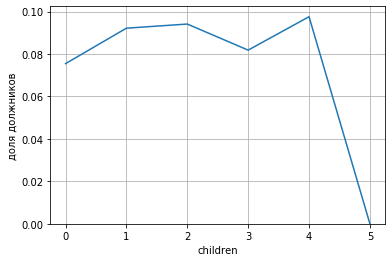

In [38]:
df_ch_debt=df.groupby('children')['debt'].agg(['count','sum','mean'])
df_ch_debt.columns=['общее кол-во','кол-во должников','доля должников']
display(df_ch_debt)
df_ch_debt['доля должников'].plot(grid=True,ylim=0).set_ylabel('доля должников')

А если исключить пенсионеров:

,общее кол-во,кол-во должников,доля должников
children,,,
0,10577,865,0.081781
1,4532,429,0.094660
2,2031,190,0.093550
3,324,26,0.080247
4,40,4,0.100000
5,9,0,0.000000


Text(0, 0.5, 'доля должников')

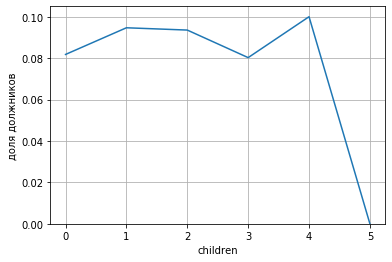

In [39]:
df_ch_debt=df[df['income_type']!='пенсионер'].groupby('children')['debt'].agg(['count','sum','mean'])
df_ch_debt.columns=['общее кол-во','кол-во должников','доля должников']
display(df_ch_debt)
df_ch_debt['доля должников'].plot(grid=True,ylim=0).set_ylabel('доля должников')

Пенсионеры:

,общее кол-во,кол-во должников,доля должников
children,,,
0,3510,198,0.056410
1,275,14,0.050909
2,20,3,0.150000
3,6,1,0.166667
4,1,0,0.000000


Text(0, 0.5, 'доля должников')

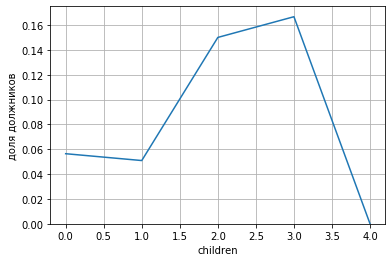

In [40]:
df_ch_debt=df[df['income_type']=='пенсионер'].groupby('children')['debt'].agg(['count','sum','mean'])
df_ch_debt.columns=['общее кол-во','кол-во должников','доля должников']
display(df_ch_debt)
df_ch_debt['доля должников'].plot(grid=True,ylim=0).set_ylabel('доля должников')

### Вывод

Отсутствие должников среди людей с 5 детьми и более высокий процент среди родителей с 4 детьми скорее всего случайность, вызванная относительно небольшим кол-вом данных о них.  
Казалось бы, люди с детьми должны ответственнее подходить к планированию бюджета, но.. по крайней мере данная выборка демонстрирует, что **наличие хотя бы одного ребенка повышает риск просрочки кредита на 1.5-2%**  
Мы также попытались рассмотреть, как дети влияют на возвратность кредитов среди лиц пенсионного возраста. Нельзя сказать, что на такой небольшой выборке нам удалось увидеть подтверждение гипотезы (что потенциальное наличие трудоспособного члена семьи должно повысить шансы на выплату кредита в срок), но зато мы заметили, что пенсионеры отличаются крайне высокой дисциплиной в этом вопросе.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

,общее кол-во,кол-во должников,доля должников
family_status,,,
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4132,385,0.093175
женат / замужем,12258,925,0.075461
не женат / не замужем,2795,273,0.097674


Text(0, 0.5, 'доля должников')

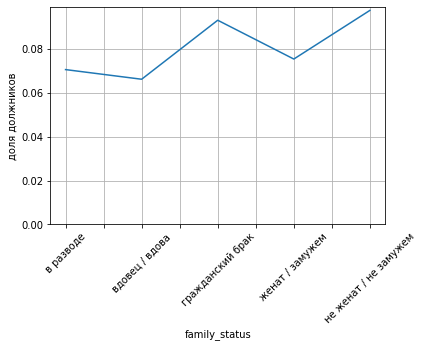

In [41]:
df_fs_debt=df.groupby('family_status')['debt'].agg(['count','sum','mean'])
df_fs_debt.columns=['общее кол-во','кол-во должников','доля должников']
display(df_fs_debt)
df_fs_debt['доля должников'].plot(grid=True,rot=45,ylim=0).set_ylabel('доля должников')

### Вывод

Как бы странно это ни звучало, но похоже на возвратность кредита влияет не наличие партнера, а наличие зарегистрированного хоть раз брака. Как бы то ни было, **холостые или состоящие в гражданском браке люди оказываются должниками на 1.5-2% чаще** чем те, кто зарегистрировал свои отношения официально.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,общее кол-во,кол-во должников,доля должников
category_total_income,,,
no_info,2090,170,0.081340
высокий,1518,112,0.073781
низкий,5475,436,0.079635
сверхвысокий,125,8,0.064000
средний,12117,1004,0.082859


Text(0, 0.5, 'доля должников')

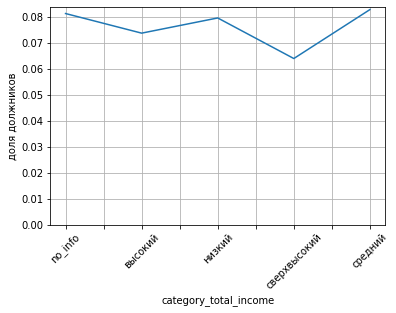

In [42]:
df_cti_debt=df.groupby('category_total_income')['debt'].agg(['count','sum','mean'])
df_cti_debt.columns=['общее кол-во','кол-во должников','доля должников']
display(df_cti_debt)
df_cti_debt['доля должников'].plot(grid=True,rot=45,ylim=0).set_ylabel('доля должников')

### Вывод

Из таблицы видно, что весьма значительно от остальных отличаются данные по клиентам со сверхвысокими доходами. Но их в нашей выборке очень немного, а данные, которые попали в эту категорию, не вызывают уверенности. Если заказчик захочет сконцентрироваться на подобных "китах", мы можем запросить выборку по клиентам с доходами в 4 раза выше медианных и провести полноценный анализ.
Пока же можно утверждать лишь то, что **люди с низкими и высокими доходами отличаются чуть большей дисциплинированностью (0.5-1%)**, чем клиенты из среднего звена. Вероятно, первые подходят к этому, как к очень серьезному собитию, а вторые реже испытывают стесненность в средствах.

- Как разные цели кредита влияют на его возврат в срок?

,общее кол-во,кол-во должников,доля должников
purpose,,,
автомобиль,4278,399,0.093268
недвижимость,10144,744,0.073344
образование,3988,369,0.092528
ремонт жилья,603,35,0.058043
свадьба,2312,183,0.079152


Text(0, 0.5, 'доля должников')

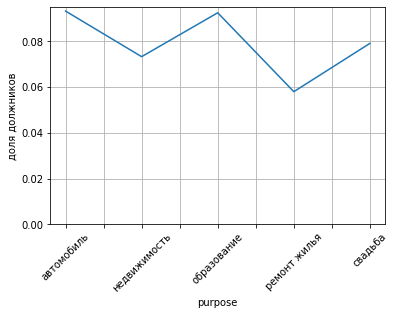

In [43]:
df_purp_debt=df.groupby('purpose')['debt'].agg(['count','sum','mean'])
df_purp_debt.columns=['общее кол-во','кол-во должников','доля должников']
display(df_purp_debt)
df_purp_debt['доля должников'].plot(grid=True,rot=45,ylim=0).set_ylabel('доля должников')

### Вывод

Некоторые категории заметно более надежны, чем другие. Вероятно это связано с тем, что большие кредиты на покупку недвижимости банк выдает проведя более тщательную проверку, а кредит на образование несет с собой много рисков (возможно человеку придется совмещать работу и учебу или сама учеба окажется для него слишком сложной). Можно придумать оправдание любым цифрам, но на данный момент: **выплаты по кредитам за автомобиль и образование, задерживают на 1.5-2% чаще, чем кредиты на операции с недвижимостью или ремонт жилья**.

### Шаг 4. Общий вывод

Наш лучший клиент?
- женат/замужем
- без детей
- с высоким доходом
- берет кредит на покупку или ремонт квартиры

Ну а основная группа риска
- холостые люди
- со средним доходом
- взявшие кредит на образование или автомобиль